In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic_data = pd.read_csv('../input/titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived
X = pd.get_dummies(X)

In [6]:
X = X.fillna({'Age' : X.Age.median()})

In [7]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.score(X_train, y_train)

0.9798657718120806

In [13]:
clf.score(X_test, y_test)

0.7762711864406779

In [14]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8406040268456376

In [15]:
clf.score(X_test, y_test)

0.8101694915254237

In [16]:
from sklearn.model_selection import cross_val_score
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.8305084745762713

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [19]:
parameters = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [20]:
gcv_clf = GridSearchCV(clf, parameters, cv = 5)
gcv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [21]:
gcv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [22]:
gcv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [23]:
best_clf = gcv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7661016949152543

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
y_pred = best_clf.predict(X_test)

In [26]:
precision_score(y_test, y_pred)

0.7931034482758621

In [27]:
recall_score(y_test, y_pred)

0.575

In [28]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

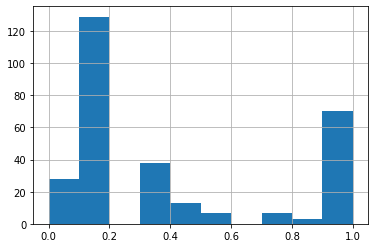

In [29]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [30]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [31]:
precision_score(y_test, y_pred)

0.8493150684931506

In [32]:
recall_score(y_test, y_pred)

0.5166666666666667

In [33]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

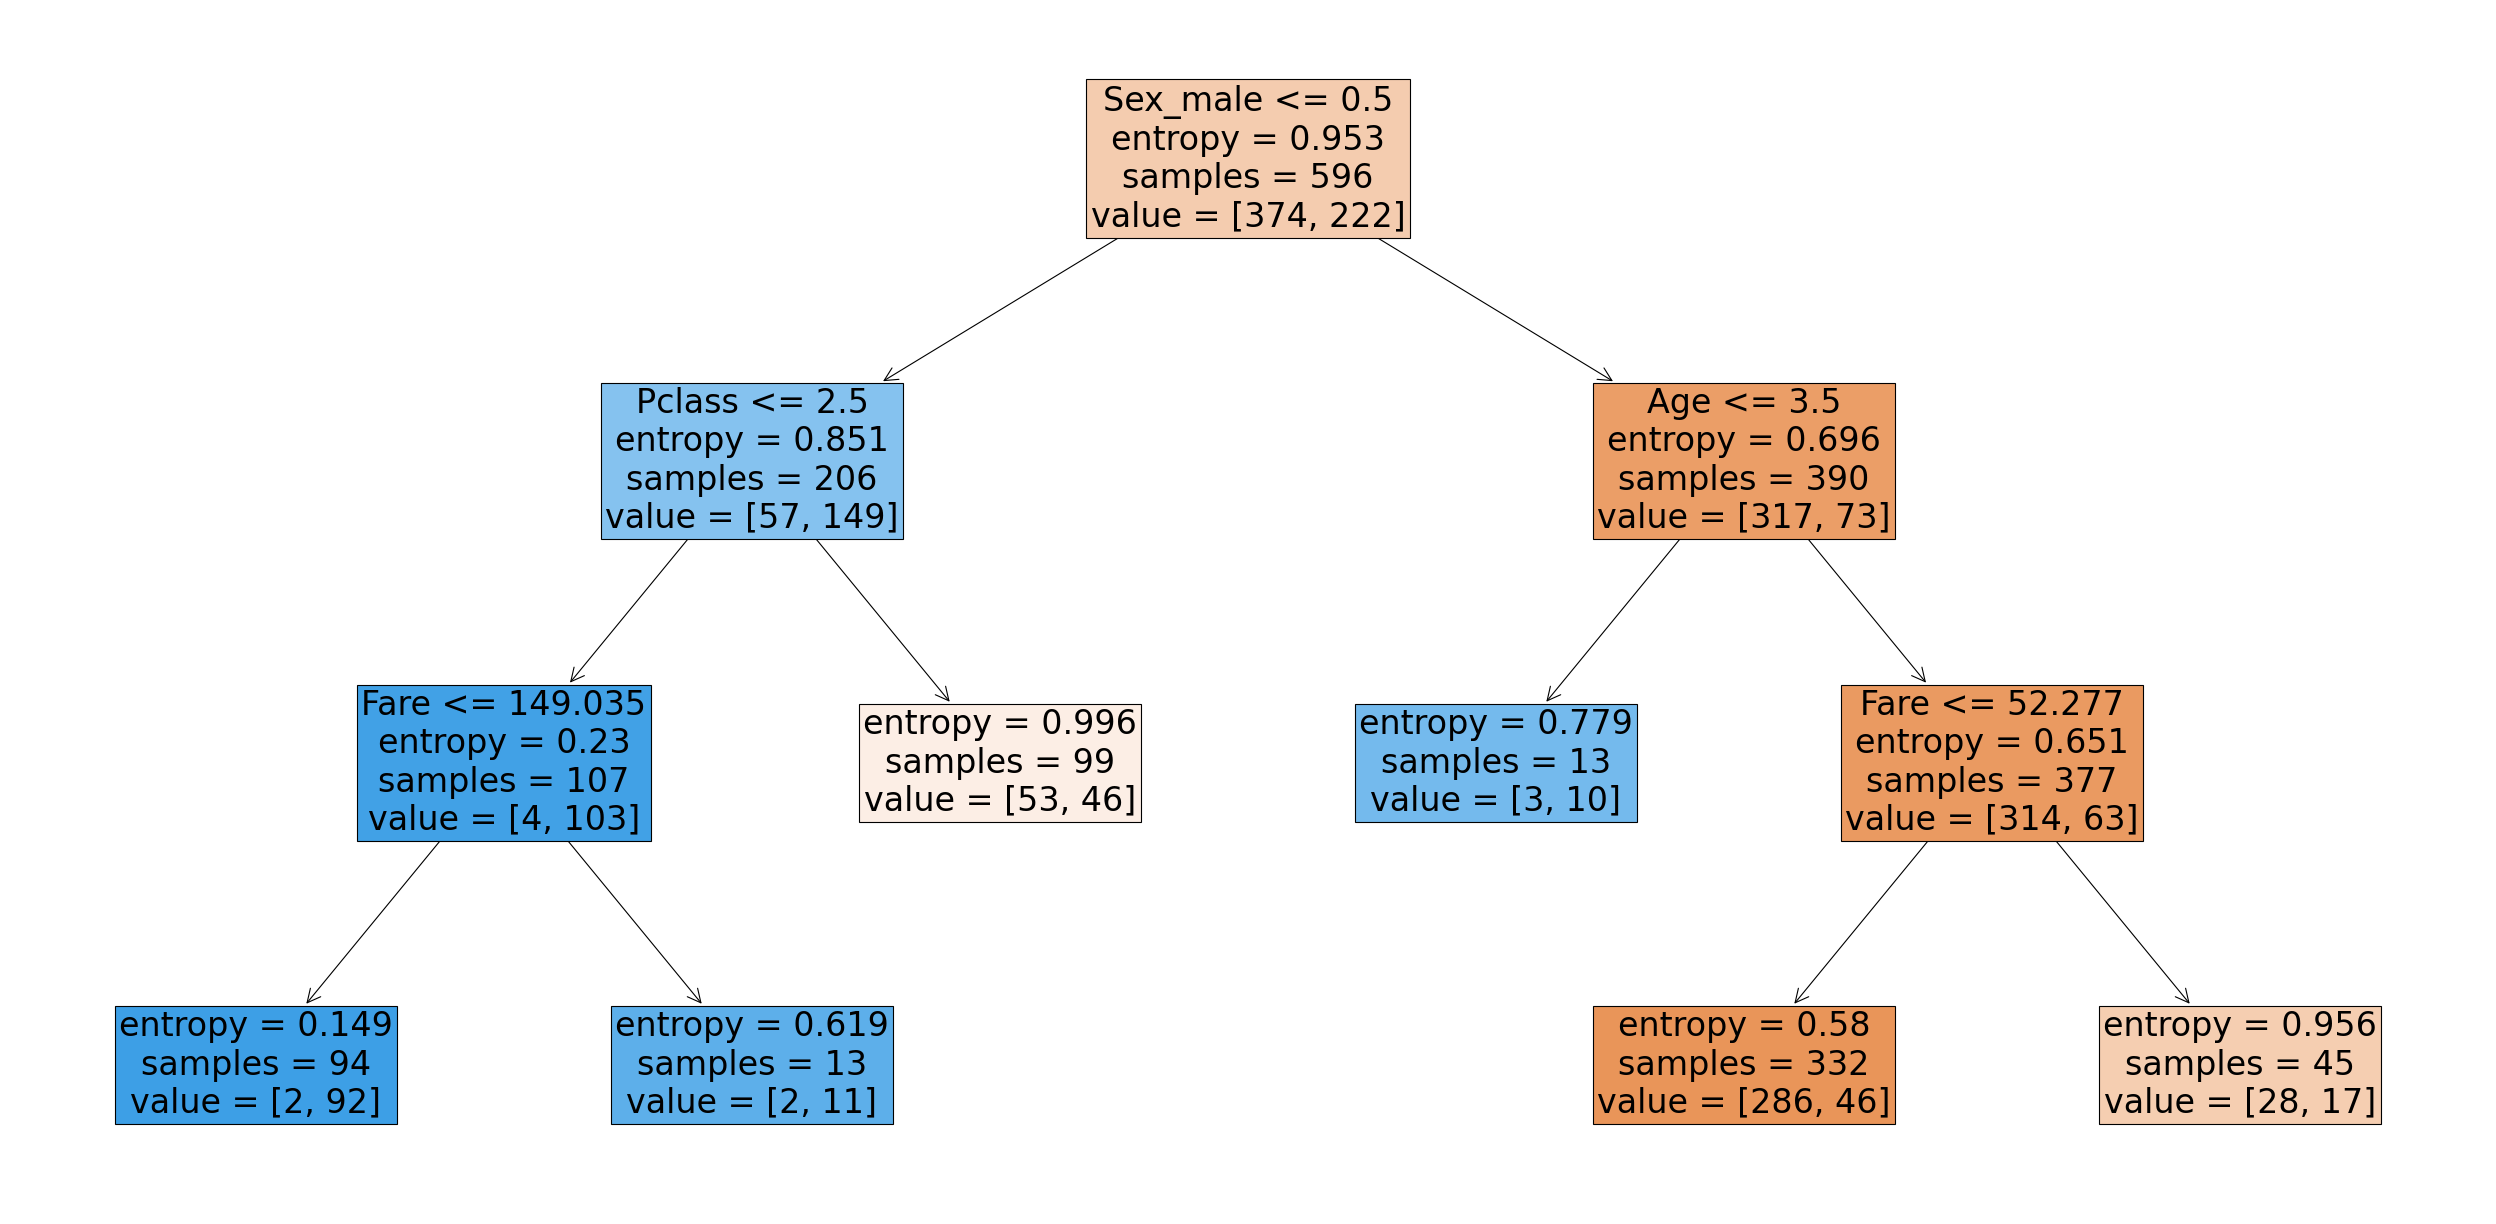

In [35]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rf = RandomForestClassifier()

In [38]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [39]:
gcv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [40]:
gcv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [41]:
gcv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [42]:
best_rf = gcv_clf.best_estimator_

In [43]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=20)

In [44]:
y_pred = best_rf.predict(X_test)

In [45]:
recall_score(y_test, y_pred)

0.675

In [46]:
precision_score(y_test, y_pred)

0.8350515463917526

In [47]:
best_rf.score(X_test, y_test)

0.8135593220338984

In [48]:
features_importances = best_rf.feature_importances_

In [49]:
features_importances_df = pd.DataFrame({'features' : list(X_train),
                                        'features_importances' : features_importances})

In [50]:
features_importances_df

,features,features_importances
0,Pclass,0.107350
1,Age,0.149679
2,SibSp,0.053193
3,Parch,0.036681
4,Fare,0.203060
5,Sex_female,0.203911
6,Sex_male,0.193842
7,Embarked_C,0.018883
8,Embarked_Q,0.005967
9,Embarked_S,0.027434


In [51]:
features_importances_df.sort_values('features_importances', ascending=False)

,features,features_importances
5,Sex_female,0.203911
4,Fare,0.203060
6,Sex_male,0.193842
1,Age,0.149679
0,Pclass,0.107350
2,SibSp,0.053193
3,Parch,0.036681
9,Embarked_S,0.027434
7,Embarked_C,0.018883
8,Embarked_Q,0.005967


In [90]:
test_data = pd.read_csv('../input/titanic/test.csv')

In [91]:
X = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
X = pd.get_dummies(X)

In [92]:
X = X.fillna({'Age' : X.Age.median(), 'Fare' : X.Fare.median()})

In [93]:
test_predictions = best_rf.predict(X)

In [104]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId.astype(int), 'Survived': test_predictions.astype(int)})
output.to_csv('submission.csv', index=False)